# Assignment 2: Mini-project ( code only)

##### Student name - Aditya Venugopalan Nediyirippil
##### Student ID - a1899824

### Importing The Libraries 

#### In this section we will import the required libraries for the analysis.





###### Note :- Only the basic libraries  will be imported in below cell . The libraries that will help in   the importing of datasets, some libraries  which will help in pre- processing and for visualization Other libraries  will be imported in the exact cell whenever they are required .



In [127]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from mlxtend.preprocessing import TransactionEncoder

### Importing the dataset 


#### In this cell we will import the training dataset , on which we will which do our analysis.  Processes like model training , parameter tuning and algorithim developement will also be done here .




###### Note:- We will be importing the "Bigger" datasets . For following reasons
###### a) A bigger training dataset gives us more diversity to learn from which results in more accuracy as it can capture wider range of data
###### b) With having to work on larger data , the model actual performance can be  can analzed
###### c) It also improves the scalability 
###### d) More robust to noise and outliers 
###### Bigger dataset , means we can deal with every kind of situation , where the frequency  and similarity was low for some items

In [128]:
df = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/basket_data_by_date_train.csv")
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850,15.30
...,...,...,...,...,...,...,...
39995,544398,GREEN METAL SWINGING BUNNY,4,18/02/2011 12:27,0.85,15311,3.40
39996,544398,PINK 3 PIECE POLKADOT CUTLERY SET,2,18/02/2011 12:27,4.15,15311,8.30
39997,544398,GLITTER HANGING BUTTERFLY STRING,4,18/02/2011 12:27,2.10,15311,8.40
39998,544398,WHITE SPOT RED CERAMIC DRAWER KNOB,6,18/02/2011 12:27,1.25,15311,7.50


#### Statistics of the data 
###### In the below cells we will check the summary and statistics of the data

In [129]:
df.describe

<bound method NDFrame.describe of        BillNo                             Itemname  Quantity  \
0      536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
1      536365    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2      536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
3      536365       RED WOOLLY HOTTIE WHITE HEART.         6   
4      536365         SET 7 BABUSHKA NESTING BOXES         2   
...       ...                                  ...       ...   
39995  544398           GREEN METAL SWINGING BUNNY         4   
39996  544398    PINK 3 PIECE POLKADOT CUTLERY SET         2   
39997  544398     GLITTER HANGING BUTTERFLY STRING         4   
39998  544398   WHITE SPOT RED CERAMIC DRAWER KNOB         6   
39999  544398                TEA TIME DES TEA COSY         4   

                   Date  Price  CustomerID   cost  
0        1/12/2010 8:26   3.39       17850  20.34  
1        1/12/2010 8:26   4.25       17850  25.50  
2        1/12/2010 8:26   2.55       1785

In [130]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850,15.30


In [131]:
df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
39995,544398,GREEN METAL SWINGING BUNNY,4,18/02/2011 12:27,0.85,15311,3.4
39996,544398,PINK 3 PIECE POLKADOT CUTLERY SET,2,18/02/2011 12:27,4.15,15311,8.3
39997,544398,GLITTER HANGING BUTTERFLY STRING,4,18/02/2011 12:27,2.10,15311,8.4
39998,544398,WHITE SPOT RED CERAMIC DRAWER KNOB,6,18/02/2011 12:27,1.25,15311,7.5
39999,544398,TEA TIME DES TEA COSY,4,18/02/2011 12:27,2.55,15311,10.2


In [132]:
print(df.dtypes)

BillNo          int64
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID      int64
cost          float64
dtype: object


## Exploratory Data Analysis

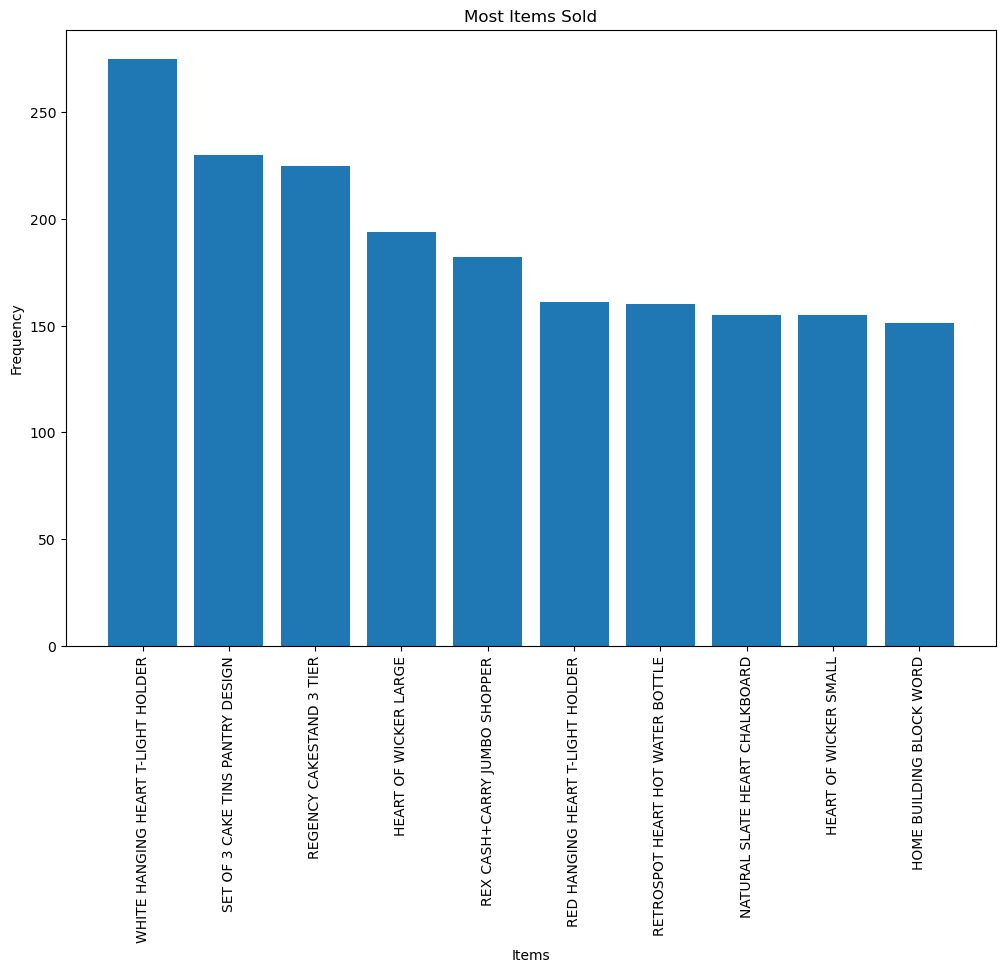

In [190]:
import matplotlib.pyplot as plt
import numpy as np

most_items_sold = df.groupby(by='Itemname').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)
bars = most_items_sold['Itemname']
height = most_items_sold['Frequency']
x_positions = np.arange(len(bars))

plt.figure(figsize=(12, 8))  # Adjust the figsize here to reduce the size
plt.bar(x_positions, height)
plt.title("Most Items Sold")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.xticks(x_positions, bars, rotation='vertical')

plt.show()


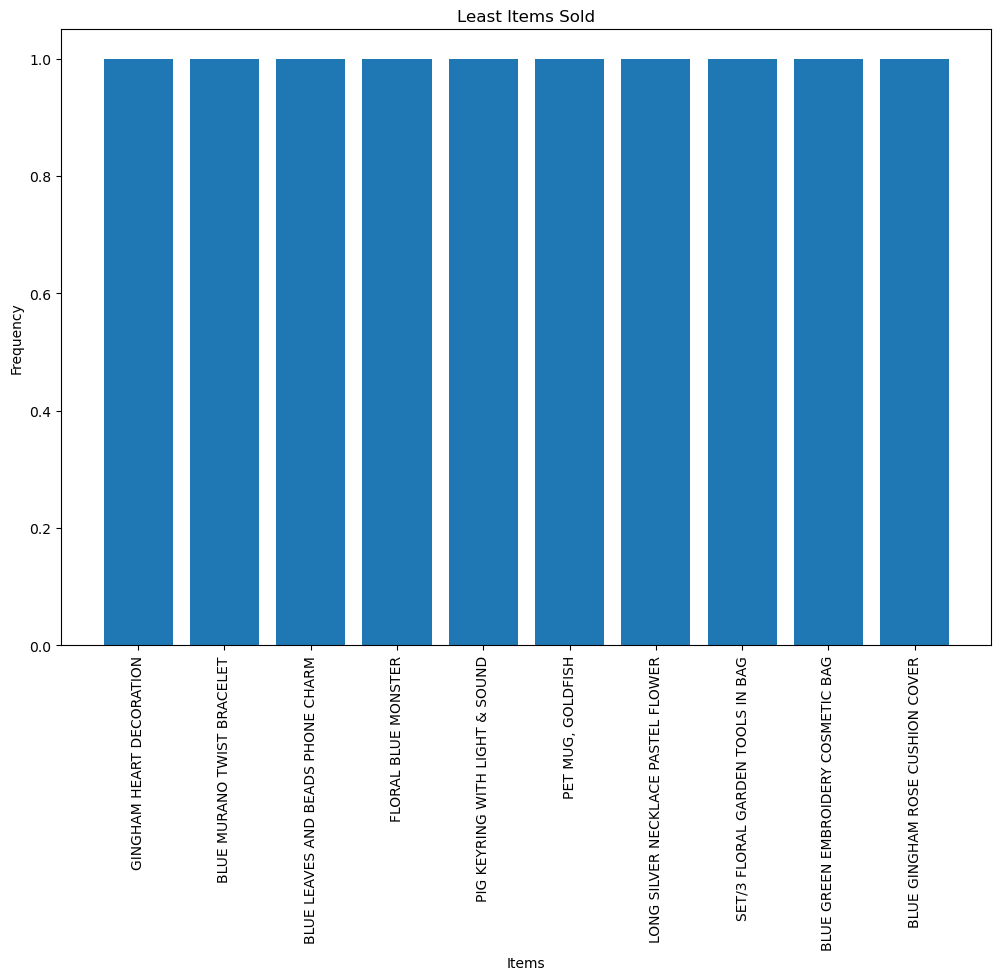

In [191]:
least_items_sold = df.groupby(by='Itemname').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=True).head(10)
bars = least_items_sold['Itemname']
height = least_items_sold['Frequency']
x_positions = np.arange(len(bars))

plt.figure(figsize=(12, 8))  # Adjust the figsize here to reduce the size
plt.bar(x_positions, height)
plt.title("Least Items Sold")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.xticks(x_positions, bars, rotation='vertical')

plt.show()
# Checking least items sold

###### Detection of outliers in our data with the help of a boxplot

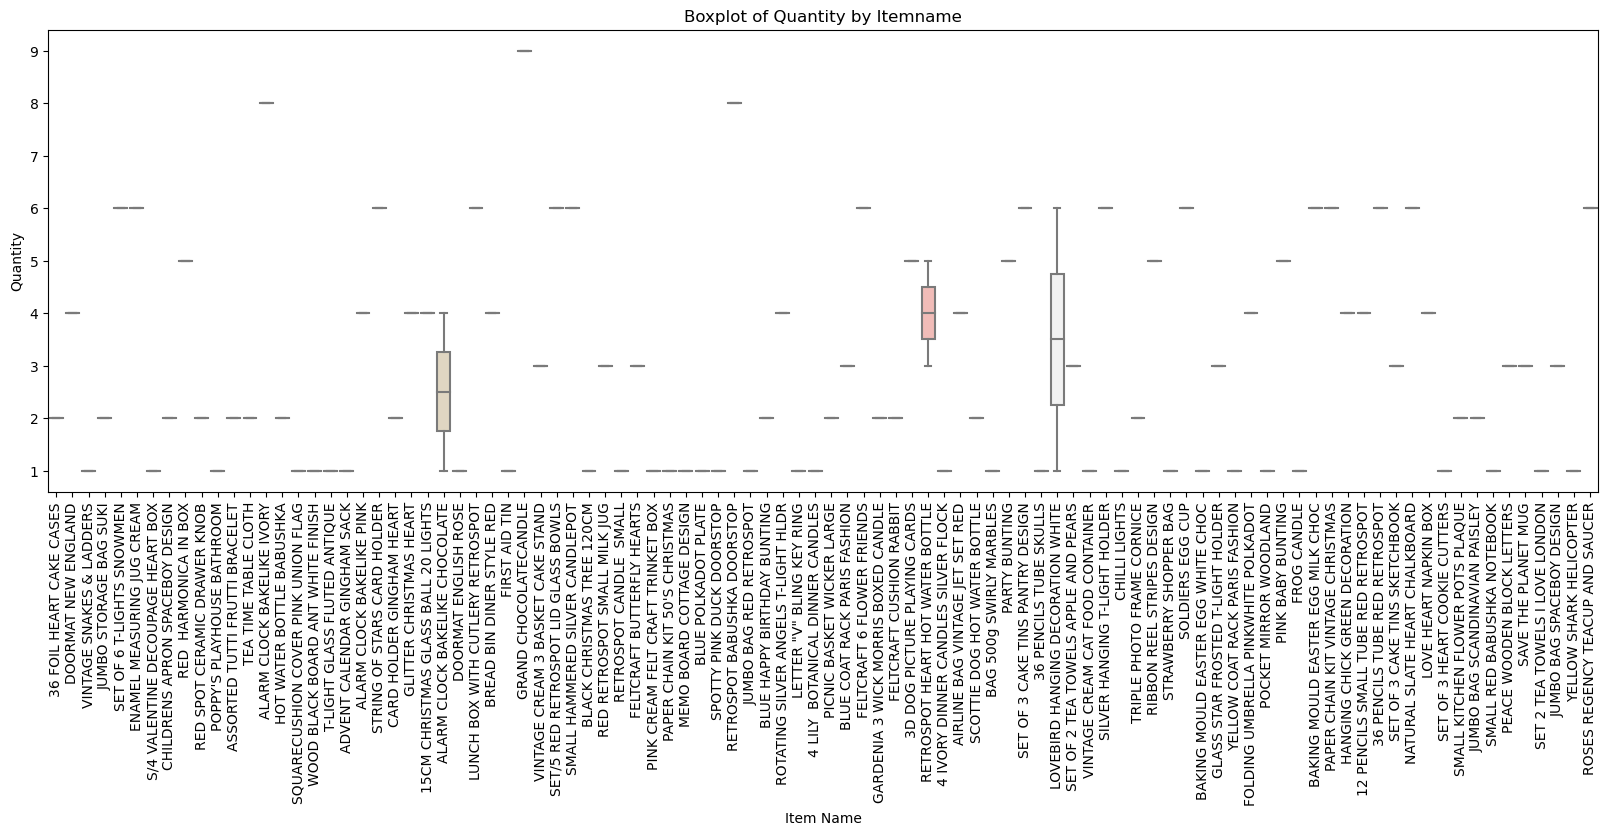

In [134]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Itemname', y='Quantity', data=df.sample(n=100), palette='Pastel1')
plt.title('Boxplot of Quantity by Itemname')
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

###### Correlation Matrix to show Correlation between variables

C:\Users\Aditya Venugopalan\AppData\Local\Temp\ipykernel_12804\1957550522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


Text(0.5, 1.0, 'Correlation Matrix of Training Dataset')

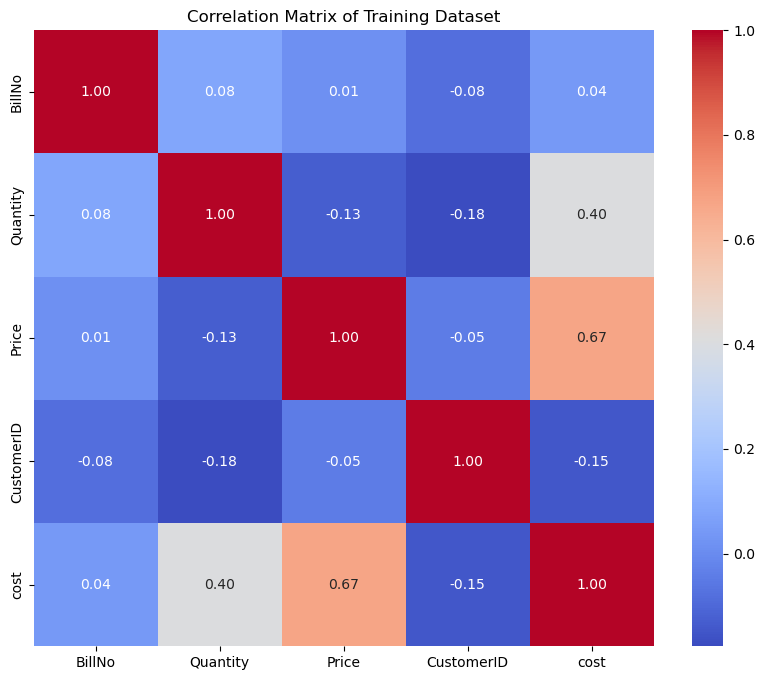

In [135]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Training Dataset')

###### This heatmap was just plotted to show the co relation . It will be not included in the report as Non - Technical audience will find it difficult to understand it. The only reason it was plotted so that in future if any modifications are required which includes splitting,cross validation , dimension reduction or feature selection we can refer to this heatmap . And hence it will be not shown in the report pdf/word file

### Pre - Processing 


###### In this section we will do following 
###### a) Checking correct data types 
###### b) Check missing values 
###### c) Checking Negative values, We want to make sure the values of prices, quantity and cost are not in negative since these values cannot be negative.
###### d) Outliers such as cases where items quantity are less than 3 or below average will not be removed. We want to include all possible cases since situations where no pattern detected between the users and the items .
###### e) Also  we want to study situations where including certain items do not show any similarities or form any relationships , since this will help us to tackle cases of Cold start.
###### f) Dropping duplicate values 


In [136]:
## As we can see from above "print(df.dtypes)" command, the variable date is not in correct data type hence we will change it into date format

df['Date'] = pd.to_datetime(df["Date"])

In [137]:
## Checking whether the date variable  has been changed or not

print(df.dtypes)

BillNo                 int64
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID             int64
cost                 float64
dtype: object


In [138]:
df
# Now it is safe to assume the date is in correct date type format

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,20.34
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850,25.50
2,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,15.30
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,20.34
4,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850,15.30
...,...,...,...,...,...,...,...
39995,544398,GREEN METAL SWINGING BUNNY,4,2011-02-18 12:27:00,0.85,15311,3.40
39996,544398,PINK 3 PIECE POLKADOT CUTLERY SET,2,2011-02-18 12:27:00,4.15,15311,8.30
39997,544398,GLITTER HANGING BUTTERFLY STRING,4,2011-02-18 12:27:00,2.10,15311,8.40
39998,544398,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2011-02-18 12:27:00,1.25,15311,7.50


In [139]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


Missing values:
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64


In [140]:
negative_quantity = df[df['Quantity'] < 0]
negative_price = df[df['Price'] < 0]
negative_cost = df[df['cost'] < 0]

if not negative_quantity.empty:
    print("Warning: Some rows have negative values in the Quantity column.")
    print(negative_quantity)
    
if not negative_cost.empty:
    print("Warning: Some rows have negative values in the Price column.")
    print(negative_cost)
    
if not negative_price.empty:
    print("Warning: Some rows have negative values in the Price column.")
    print(negative_price)

###### Dropping duplicates ftom the training dataset


In [141]:
df.drop_duplicates(inplace=True)

###### Since no output exists , we can conclude there is no negative values

## Implementation of Recommendation system using collaborative filtering method

In [142]:
df_agg = df.groupby(['CustomerID', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()

user_item_matrix = df_agg.pivot(index='CustomerID', columns='Itemname', values='Quantity').fillna(0)
# This code is taken with reference to MyUni Notes 

In [143]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(user_item_matrix.T)
def recommend_items_for_users(user_ids, top_n=5):
    recommendations_for_users = {}
    for user_id in user_ids:
        user_items = set(user_item_matrix.columns[user_item_matrix.loc[user_id]>0])
        item_scores = {}
        for item in user_items:
            item_index = item_id_to_index[item]
            similar_items = np.argsort(item_similarity[item_index])[::-1][1:]
            for sim_item in similar_items:
                sim_item_id = index_to_item_id[sim_item]
                if sim_item_id not in user_items:
                    item_scores.setdefault(sim_item_id, 0)
                    item_scores[sim_item_id] += item_similarity[item_index, sim_item] * user_item_matrix.loc[user_id, item]

        # Rank and select top recommendations
        top_recommendations = sorted(item_scores, key=item_scores.get, reverse=True)[:top_n]
        recommendations_for_users[user_id] = top_recommendations

    return recommendations_for_users

# Map item ID to matrix index
item_id_to_index = {item_id: i for i, item_id in enumerate(user_item_matrix.columns)}
# Create matrix index to item ID mapping
index_to_item_id = {i: item_id for item_id, i in item_id_to_index.items()}

# The Above code was developed with the help of the code provided in the  MyUni Workshop 
# The idea of mapping the id's was given to me by chatGpt


In [144]:
# Example list of user IDs
user_ids = [14341,13263,14688, 15311, 17865]
# Generate recommendations for users
recommendations_for_users = recommend_items_for_users(user_ids)

In [145]:
for user_id, recommendations in recommendations_for_users.items():
    print("Top Recommendations for User", user_id, ":", recommendations)

Top Recommendations for User 14341 : ['JUMBO STORAGE BAG SUKI', 'JUMBO BAG PINK POLKADOT', 'JUMBO BAG OWLS', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO BAG PINK VINTAGE PAISLEY']
Top Recommendations for User 13263 : ['HOT BATHS METAL SIGN', 'GIN + TONIC DIET METAL SIGN', "I'M ON HOLIDAY METAL SIGN", 'CHOCOLATE THIS WAY METAL SIGN', 'BEWARE OF THE CAT METAL SIGN']
Top Recommendations for User 14688 : ['JUMBO BAG OWLS', 'JUMBO BAG STRAWBERRY', 'JUMBO BAG WOODLAND ANIMALS', 'JUMBO BAG SPACEBOY DESIGN', 'JUMBO STORAGE BAG SKULLS']
Top Recommendations for User 15311 : ['RED STRIPE CERAMIC DRAWER KNOB', 'SET OF 72 PINK HEART PAPER DOILIES', 'SMALL YELLOW BABUSHKA NOTEBOOK', 'JUMBO BAG RED RETROSPOT', 'SMALL PURPLE BABUSHKA NOTEBOOK']
Top Recommendations for User 17865 : ['WOOD S/3 CABINET ANT WHITE FINISH', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WOODEN PICTURE FRAME WHITE FINISH', 'WHITE METAL LANTERN', 'KNITTED UNION FLAG HOT WATER BOTTLE']


In [146]:
!pip install tabulate #https://pypi.org/project/tabulate/

# For better visualization I decided to display the output in a tabular form

ERROR: Invalid requirement: '#https://pypi.org/project/tabulate/'


In [147]:
from tabulate import tabulate

user_ids = [14341,13263,14688, 15311, 17865]  # Example list of user IDs
recommendations_for_users = recommend_items_for_users(user_ids)

table = []
for user_id, recommendations in recommendations_for_users.items():
    recommendations_formatted = "\n".join(recommendations)
    table.append([f"User {user_id}", recommendations_formatted])

print(tabulate(table, headers=["User ID", "Top Recommendations"], tablefmt="grid"))


+------------+-------------------------------------+
| User ID    | Top Recommendations                 |
+============+=====================================+
| User 14341 | JUMBO STORAGE BAG SUKI              |
|            | JUMBO BAG PINK POLKADOT             |
|            | JUMBO BAG OWLS                      |
|            | JUMBO  BAG BAROQUE BLACK WHITE      |
|            | JUMBO BAG PINK VINTAGE PAISLEY      |
+------------+-------------------------------------+
| User 13263 | HOT BATHS METAL SIGN                |
|            | GIN + TONIC DIET METAL SIGN         |
|            | I'M ON HOLIDAY METAL SIGN           |
|            | CHOCOLATE THIS WAY METAL SIGN       |
|            | BEWARE OF THE CAT METAL SIGN        |
+------------+-------------------------------------+
| User 14688 | JUMBO BAG OWLS                      |
|            | JUMBO BAG STRAWBERRY                |
|            | JUMBO BAG WOODLAND ANIMALS          |
|            | JUMBO BAG SPACEBOY DESIGN      

## Recommendation based on Items

In [148]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate item-item similarity
item_similarity = cosine_similarity(user_item_matrix.T)

# Convert similarity matrix to DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def recommend_items_for_item(item_name, top_n=5):
    # Get top N similar items to the item_name
    top_similar_items = item_similarity_df[item_name].sort_values(ascending=False)[1:top_n+1].reset_index()
    top_similar_items.columns = ['Itemname', 'Similarity']
    return top_similar_items

# Example usage: Let's see what our system recommends with the most popular item
recommended_items = recommend_items_for_item('RETROSPOT HEART HOT WATER BOTTLE', 5)
print("Top 5 recommended items for RETROSPOT HEART HOT WATER BOTTLE are:")
print(recommended_items)


Top 5 recommended items for RETROSPOT HEART HOT WATER BOTTLE are:
                          Itemname  Similarity
0     SCOTTIE DOG HOT WATER BOTTLE    0.503395
1      GREY HEART HOT WATER BOTTLE    0.416226
2  PINK PILLAR CANDLE SILVER FLOCK    0.369103
3  HOT WATER BOTTLE I AM SO POORLY    0.351886
4          LAVENDER INCENSE IN TIN    0.331935


In [149]:
table = []
for index, row in recommended_items.iterrows():
    table.append([row['Itemname'], row['Similarity']])

# Display the recommendations in a tabular format for better visualization
print(tabulate(table, headers=["Item Name", "Similarity"], tablefmt="grid"))

+---------------------------------+--------------+
| Item Name                       |   Similarity |
+=================================+==============+
| SCOTTIE DOG HOT WATER BOTTLE    |     0.503395 |
+---------------------------------+--------------+
| GREY HEART HOT WATER BOTTLE     |     0.416226 |
+---------------------------------+--------------+
| PINK PILLAR CANDLE SILVER FLOCK |     0.369103 |
+---------------------------------+--------------+
| HOT WATER BOTTLE I AM SO POORLY |     0.351886 |
+---------------------------------+--------------+
| LAVENDER INCENSE IN TIN         |     0.331935 |
+---------------------------------+--------------+


## Testing the data

In [150]:
testing_data = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/basket_data_by_date_test_big (1).csv")

In [151]:
testing_data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,572741,CHRISTMAS CRAFT LITTLE FRIENDS,6,25-10-2011 15:47,2.10,14341,12.60
1,572741,BISCUIT TIN 50'S CHRISTMAS,6,25-10-2011 15:47,2.89,14341,17.34
2,572741,CHRISTMAS CRAFT TREE TOP ANGEL,6,25-10-2011 15:47,2.10,14341,12.60
3,572741,ROTATING SILVER ANGELS T-LIGHT HLDR,6,25-10-2011 15:47,2.55,14341,15.30
4,572741,PAPER CHAIN KIT 50'S CHRISTMAS,6,25-10-2011 15:47,2.95,14341,17.70
...,...,...,...,...,...,...,...
65321,581587,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680,14.85
65322,581587,ALARM CLOCK BAKELIKE PINK,4,09-12-2011 12:50,3.75,12680,15.00
65323,581587,CHILDRENS APRON SPACEBOY DESIGN,8,09-12-2011 12:50,1.95,12680,15.60
65324,581587,ALARM CLOCK BAKELIKE GREEN,4,09-12-2011 12:50,3.75,12680,15.00


In [152]:
# Load the testing dataset
testing_data = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/basket_data_by_date_test_big (1).csv")

# Drop all duplicates from the testing data
testing_data = testing_data.drop_duplicates()

# Now you can continue with your further processing with the testing data


In [153]:
testing_data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
0,572741,CHRISTMAS CRAFT LITTLE FRIENDS,6,25-10-2011 15:47,2.10,14341,12.60
1,572741,BISCUIT TIN 50'S CHRISTMAS,6,25-10-2011 15:47,2.89,14341,17.34
2,572741,CHRISTMAS CRAFT TREE TOP ANGEL,6,25-10-2011 15:47,2.10,14341,12.60
3,572741,ROTATING SILVER ANGELS T-LIGHT HLDR,6,25-10-2011 15:47,2.55,14341,15.30
4,572741,PAPER CHAIN KIT 50'S CHRISTMAS,6,25-10-2011 15:47,2.95,14341,17.70
...,...,...,...,...,...,...,...
65321,581587,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680,14.85
65322,581587,ALARM CLOCK BAKELIKE PINK,4,09-12-2011 12:50,3.75,12680,15.00
65323,581587,CHILDRENS APRON SPACEBOY DESIGN,8,09-12-2011 12:50,1.95,12680,15.60
65324,581587,ALARM CLOCK BAKELIKE GREEN,4,09-12-2011 12:50,3.75,12680,15.00


In [154]:
# Load the testing dataset
testing_data = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/basket_data_by_date_test_big (1).csv")

# Aggregate and pivot the testing data
testing_agg = testing_data.groupby(['CustomerID', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
testing_item_matrix = testing_agg.pivot(index='CustomerID', columns='Itemname', values='Quantity').fillna(0)


In [177]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the testing dataset
testing_data = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/basket_data_by_date_test_big (1).csv")

# Specify the list of user IDs to consider
user_ids = [14341, 13263, 14688, 15311, 17865]

# Aggregate and pivot the testing data
testing_agg = testing_data.groupby(['CustomerID', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
testing_item_matrix = testing_agg.pivot(index='CustomerID', columns='Itemname', values='Quantity').fillna(0)

# Compute item-item similarity matrix
item_similarity_matrix = cosine_similarity(testing_item_matrix.T)

# Define a function to recommend items for users
def recommend_items_for_users(testing_item_matrix, item_similarity_matrix, user_ids, top_n=5):
    recommendations_for_users = {}
    for user_id in user_ids:
        # Check if user ID exists in the testing user-item matrix
        if user_id in testing_item_matrix.index:
            user_items = set(testing_item_matrix.columns[testing_item_matrix.loc[user_id] > 0])
            item_scores = {}
            for item in user_items:
                item_index = item_id_to_index.get(item)
                if item_index is not None:
                    similar_items = np.argsort(item_similarity_matrix[item_index])[::-1][1:]
                    for sim_item in similar_items:
                        sim_item_id = index_to_item_id.get(sim_item)
                        if sim_item_id not in user_items:
                            item_scores.setdefault(sim_item_id, 0)
                            item_scores[sim_item_id] += item_similarity_matrix[item_index, sim_item] * testing_item_matrix.loc[user_id, item]

            # Rank and select top recommendations
            top_recommendations = sorted(item_scores, key=item_scores.get, reverse=True)[:top_n]
            recommendations_for_users[user_id] = top_recommendations
        else:
            print(f"User ID '{user_id}' not found in the testing user-item matrix.")
            recommendations_for_users[user_id] = []
    return recommendations_for_users

# Call the function to get recommendations for users using the testing data
recommendations_for_testing_users = recommend_items_for_users(testing_item_matrix, item_similarity_matrix, user_ids)

# Print the recommendations for testing users
print("Recommendations for Testing Users:")
for user_id, recommended_items in recommendations_for_testing_users.items():
    print(f"User ID: {user_id}, Recommended Items: {recommended_items}")
# The above code was achieved with reference to MyUni notes and ChatGpt 3.5

Recommendations for Testing Users:
User ID: 14341, Recommended Items: [None, 'SET/2 RED RETROSPOT TEA TOWELS', 'MIRRORED DISCO BALL', 'SET/3 CHRISTMAS DECOUPAGE CANDLES', 'SET/20 RED RETROSPOT PAPER NAPKINS']
User ID: 13263, Recommended Items: [None, 'PAPER BUNTING WHITE LACE', 'MOCK LOBSTER FRIDGE MAGNET', '12 MESSAGE CARDS WITH ENVELOPES', '60 CAKE CASES DOLLY GIRL DESIGN']
User ID: 14688, Recommended Items: [None, 'MIRRORED DISCO BALL', 'PINK PAINTED KASHMIRI CHAIR', 'ETCHED GLASS COASTER', 'MINI JIGSAW DOLLY GIRL']
User ID: 15311, Recommended Items: [None, 'MIRRORED DISCO BALL', 'SWEETIES  STICKERS', 'SET/3 CHRISTMAS DECOUPAGE CANDLES', 'SET/2 RED RETROSPOT TEA TOWELS']
User ID: 17865, Recommended Items: [None, 'SWEETIES  STICKERS', 'FOLDING UMBRELLA PINKWHITE POLKADOT', 'FRIDGE MAGNETS LA VIE EN ROSE', 'SWIRLY CIRCULAR RUBBERS IN BAG']


In [182]:
def calculate_metrics(testing_data, recommendations_for_testing_users):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for user_id, recommended_items_set in recommendations_for_testing_users.items():
        if user_id in testing_data['CustomerID'].values:
            actual_items = set(testing_data[testing_data['CustomerID'] == user_id]['Itemname'])
            common_items = actual_items.intersection(recommended_items_set)
            precision = len(common_items) / len(recommended_items_set) if len(recommended_items_set) > 0 else 0
            recall = len(common_items) / len(actual_items) if len(actual_items) > 0 else 0
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            f1_scores.append(f1)

    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    return avg_precision, avg_recall, avg_f1


In [183]:
# Call the function to calculate metrics
precision, recall, f1 = calculate_metrics(testing_data, recommendations_for_users)

# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.2
Recall: 0.007149656266525648
F1-score: 0.013799212598425198
